In [1]:
# Setup
from os import listdir, path, remove

from IPython.display import Markdown, display
from matplotlib.pyplot import imread, show, subplots
from numpy import array
from pandas import DataFrame, merge

from utils import find_duplicates

In [2]:
# Utils
def parse_attribute(filepath):
    with open(filepath, "r") as file:
        lines = file.readlines()[1:]

    columns = [column.strip() for column in lines[0].split(' ') if column.strip()]
    columns.insert(0, "filename")

    rows = [
        [cell.strip() for cell in line.replace('\n', '').split(' ') if cell.strip()]
        for line in lines[1:]
    ]

    return DataFrame(rows, columns=columns)

def get_images_list(filepath):
    return DataFrame(listdir(filepath), columns=["file"])

def get_combined_data(df1, df2):
    df1 = df1[["filename", "Male"]]
    df2["exist"] = 1
    agg = merge(df2, df1, how="left", left_on="file", right_on="filename")
    agg = agg[agg["filename"].isna()==False]
    agg.drop(["file", "exist"], axis=1, inplace=True)
    agg.columns = ["filename", "gender"]
    return agg

def plot_n(images, dirpath, n):
    fig, axs = subplots(n, n, figsize=(12, 12), gridspec_kw={"wspace": 0, "hspace": 0})

    for i in range(n):
        for j in range(n):
            img = imread(dirpath + images[i * 5 + j])
            axs[i, j].imshow(img, aspect="auto")
            axs[i, j].axis("off")

    show()

def get_image_na (df1, df2):
    # image not within metadata
    df1 = df1[["filename", "Male"]]
    df2["exist"] = 1
    agg = merge(df2, df1, how="left", left_on="file", right_on="filename")
    agg = agg[agg["filename"].isna()==True]
    agg = agg["file"]
    return agg

def parse_na(images):
    return [x.split('(')[0] + ".jpg" for x in images]

def pair_plot_images(ori, dup, dirpath):
    fig, axs = subplots(len(ori), 2, figsize=(7, 20))
    # fig, axs = subplots(len(ori), 2)

    for i in range(len(ori)):
        img1 = imread(dirpath + ori[i])
        img2 = imread(dirpath + dup[i])
        axs[i, 0].imshow(img1, aspect="auto")
        axs[i, 0].set_title(ori[i])
        axs[i, 0].axis("off")
        axs[i, 1].imshow(img2, aspect="auto")
        axs[i, 1].set_title(dup[i])
        axs[i, 1].axis("off")

    show()

def remove_duplicate(images, dirpath):
    for item in images:
        if path.exists(dirpath + item):
            remove(dirpath + item)
            print(f"{item} removed...")

In [3]:
# Main class
def explore(config):
    attribute = parse_attribute(config["attribute_file"])
    display(Markdown("# Sample Attribute"))
    display(attribute.sample(5).T)

    images = get_images_list(config["image_path"])
    display(Markdown("# Sample Images List"))
    display(images.sample(7).T)

    metadata = get_combined_data(attribute, images)
    display(Markdown("# Sample Combined Metadata"))
    display(metadata.sample(7).T)

    n = 5
    display(Markdown("# Sample Male Images"))
    plot_n(metadata[metadata["gender"]=="1"]["filename"].sample(n*n).values.tolist(), config["image_path"], n)

    display(Markdown("# Sample Female Images"))
    plot_n(metadata[metadata["gender"]=="-1"]["filename"].sample(n*n).values.tolist(), config["image_path"], n)

    display(Markdown("# Original Gender Distributions"))
    display(metadata["gender"].apply(lambda x: "Male" if x=="1" else "Female").value_counts())

    display(Markdown("# Possible Duplicated Images"))
    image_na = list(get_image_na(attribute, images))
    image_na_parsed = parse_na(image_na)
    pair_plot_images(image_na, image_na_parsed, config["image_path"])
    display(Markdown(f"N Duplicated Images: {len(image_na)}"))
    n_duplicate = len(image_na)

    display(Markdown("# Removing Duplicated Images"))
    remove_duplicate(image_na, config["workdir"])

    display(Markdown("# Possible Duplicated Images 2"))
    image_na = [[x[0], x[1]] for _, x in find_duplicates(config["workdir"]).items()]
    pair_plot_images(array(image_na)[:,0].tolist(), array(image_na)[:,1].tolist(), config["image_path"])
    display(Markdown(f"N Duplicated Images 2: {len(image_na)}"))
    n_duplicate += len(image_na)

    display(Markdown("# Removing Duplicated Images"))
    remove_duplicate(array(image_na)[:,1].tolist(), config["workdir"])

    display(Markdown("# Total Removed Images"))
    display(Markdown(f"Removed: {n_duplicate}"))

    display(Markdown(f"N Images Ori: {len(images)}"))

    attribute = parse_attribute(config["attribute_file"])
    images = get_images_list(config["workdir"])
    metadata = get_combined_data(attribute, images)

    display(Markdown(f"N Images After Process: {metadata.shape[0]}"))
    display(metadata["gender"].apply(lambda x: "Male" if x=="1" else "Female").value_counts())

    display(Markdown(f"# Saved Processed Attributes"))
    metadata.to_csv(config["savepath"] + "list_attribute.csv", index=False)

# Sample Attribute

112118      127285      21550       23761   \
filename             112119.jpg  127286.jpg  021551.jpg  023762.jpg   
5_o_Clock_Shadow             -1          -1          -1           1   
Arched_Eyebrows               1          -1          -1          -1   
Attractive                    1           1          -1          -1   
Bags_Under_Eyes              -1          -1          -1          -1   
Bald                         -1          -1          -1          -1   
Bangs                        -1           1          -1          -1   
Big_Lips                      1          -1          -1          -1   
Big_Nose                     -1          -1          -1          -1   
Black_Hair                   -1          -1           1           1   
Blond_Hair                   -1          -1          -1          -1   
Blurry                       -1          -1          -1          -1   
Brown_Hair                    1          -1          -1           1   
Bushy_Eyebrows               -1          -1          -1          -1   
Chubby                       -1          -1          -1          -1   
Double_Chin                  -1          -1          -1          -1   
Eyeglasses                   -1          -1          -1          -1   
Goatee                       -1          -1          -1          -1   
Gray_Hair                    -1          -1          -1          -1   
Heavy_Makeup                  1           1           1          -1   
High_Cheekbones               1          -1          -1          -1   
Male                         -1          -1          -1           1   
Mouth_Slightly_Open           1          -1           1           1   
Mustache                     -1          -1          -1          -1   
Narrow_Eyes                  -1          -1          -1          -1   
No_Beard                      1           1           1          -1   
Oval_Face                    -1          -1          -1          -1   
Pale_Skin                    -1          -1          -1          -1   
Pointy_Nose                  -1          -1           1          -1   
Receding_Hairline            -1          -1          -1          -1   
Rosy_Cheeks                  -1          -1          -1          -1   
Sideburns                    -1          -1          -1          -1   
Smiling                       1          -1           1          -1   
Straight_Hair                -1          -1          -1           1   
Wavy_Hair                    -1          -1          -1          -1   
Wearing_Earrings              1          -1          -1          -1   
Wearing_Hat                  -1          -1          -1          -1   
Wearing_Lipstick              1           1           1          -1   
Wearing_Necklace             -1          -1          -1          -1   
Wearing_Necktie              -1          -1          -1          -1   
Young                         1           1           1           1   

                         43769   
filename             043770.jpg  
5_o_Clock_Shadow             -1  
Arched_Eyebrows              -1  
Attractive                    1  
Bags_Under_Eyes              -1  
Bald                         -1  
Bangs                        -1  
Big_Lips                     -1  
Big_Nose                     -1  
Black_Hair                    1  
Blond_Hair                   -1  
Blurry                       -1  
Brown_Hair                   -1  
Bushy_Eyebrows               -1  
Chubby                       -1  
Double_Chin                  -1  
Eyeglasses                   -1  
Goatee                       -1  
Gray_Hair                    -1  
Heavy_Makeup                 -1  
High_Cheekbones              -1  
Male                         -1  
Mouth_Slightly_Open          -1  
Mustache                     -1  
Narrow_Eyes                  -1  
No_Beard                      1  
Oval_Face                    -1  
Pale_Skin                    -1  
Pointy_Nose                  -1  
Receding_Hairline     

# Sample Images List

4663        808         252         4336        4064        2525  \
file  178055.jpg  082221.jpg  051761.jpg  065421.jpg  131787.jpg  123661.jpg   

            98    
file  129067.jpg

# Sample Combined Metadata

4400        217         3165        4101        2740  \
filename  062914.jpg  173174.jpg  176728.jpg  021728.jpg  139893.jpg   
gender             1          -1          -1          -1          -1   

                2847        4818  
filename  168646.jpg  132189.jpg  
gender             1          -1

# Sample Male Images

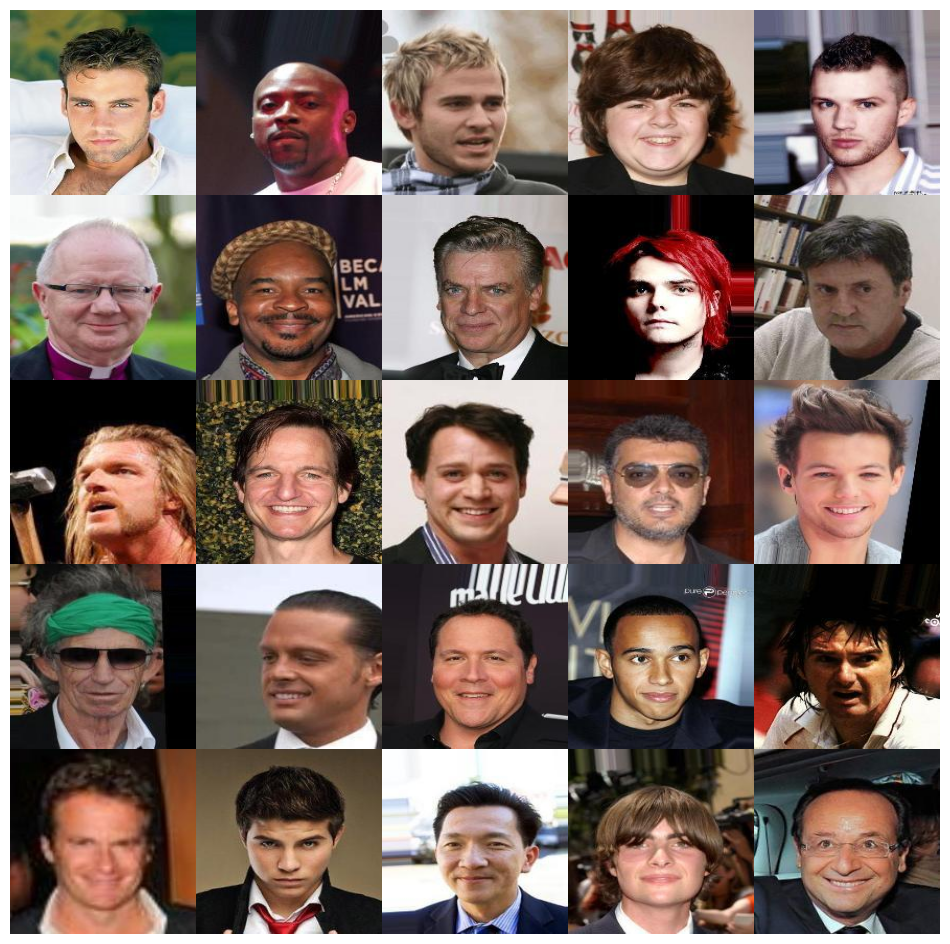

# Sample Female Images

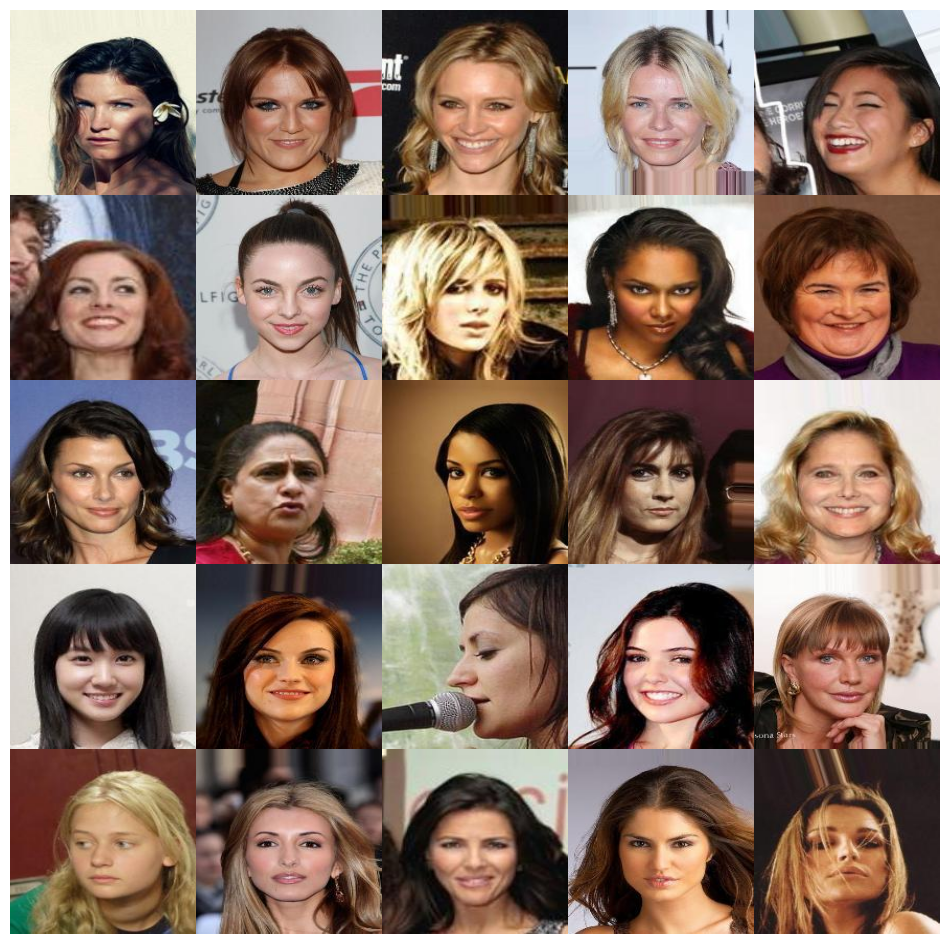

# Original Gender Distributions

Female    2953
Male      2047
Name: gender, dtype: int64

# Possible Duplicated Images

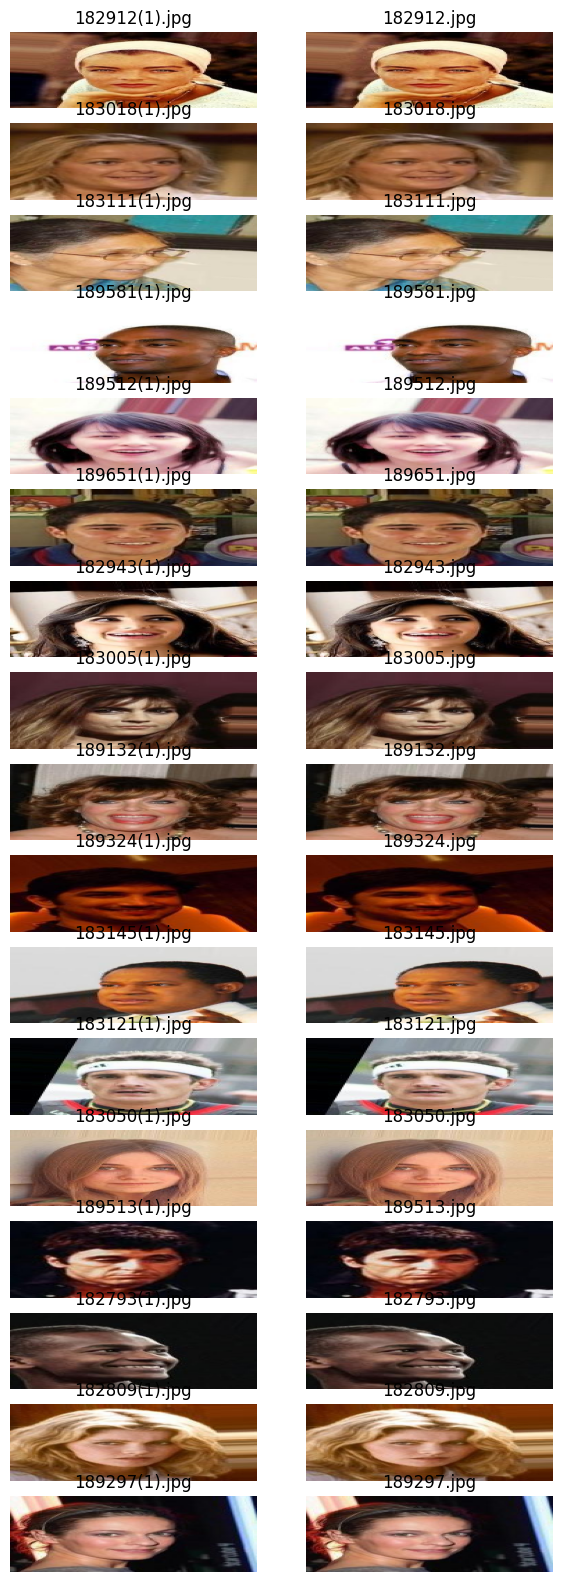

N Duplicated Images: 17

# Removing Duplicated Images

182912(1).jpg removed...
183018(1).jpg removed...
183111(1).jpg removed...
189581(1).jpg removed...
189512(1).jpg removed...
189651(1).jpg removed...
182943(1).jpg removed...
183005(1).jpg removed...
189132(1).jpg removed...
189324(1).jpg removed...
183145(1).jpg removed...
183121(1).jpg removed...
183050(1).jpg removed...
189513(1).jpg removed...
182793(1).jpg removed...
182809(1).jpg removed...
189297(1).jpg removed...


# Possible Duplicated Images 2

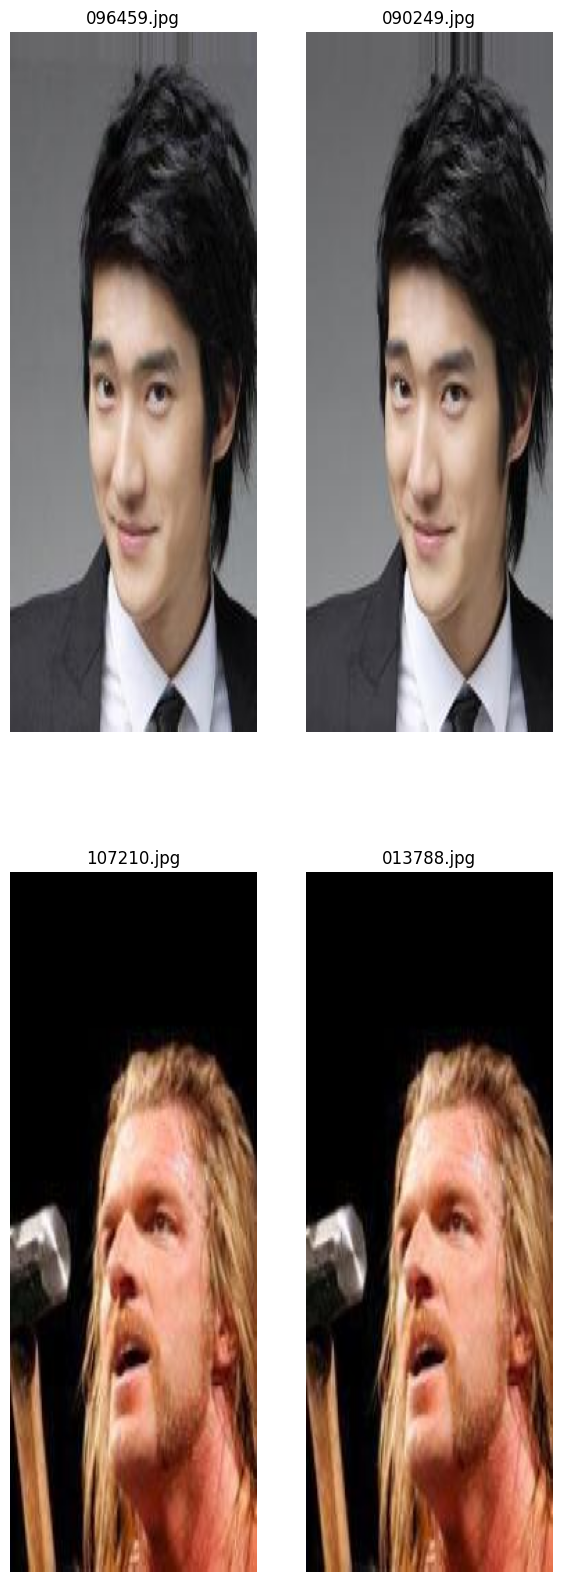

N Duplicated Images 2: 2

# Removing Duplicated Images

090249.jpg removed...
013788.jpg removed...


# Total Removed Images

Removed: 19

N Images Ori: 5017

N Images After Process: 4998

Female    2953
Male      2045
Name: gender, dtype: int64

# Saved Processed Attributes

In [4]:
if __name__ == "__main__":
    config = {
        "attribute_file": "../dataset/list_attribute.txt",
        "image_path": "../dataset/raw/",
        "workdir": "../dataset/proc/",
        "savepath": "../dataset/"
    }
    # meta = explore(config)
    explore(config)